<a href="https://colab.research.google.com/github/Ranger3560/studious-train-salary/blob/main/Global_Population_Growth_And_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/sample_data/WB_population_cleaned.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,iso3,country,year,population
0,AFE,Africa Eastern and Southern,2024,769280888.0
1,AFE,Africa Eastern and Southern,2023,750491370.0
2,AFE,Africa Eastern and Southern,2022,731821393.0
3,AFE,Africa Eastern and Southern,2021,713090928.0
4,AFE,Africa Eastern and Southern,2020,694446100.0


In [3]:
df_2024 = df[df['year'] == 2024].copy()
df_2024['population'] = pd.to_numeric(df_2024['population'], errors='coerce')
df_2024.dropna(subset=['population'], inplace=True)
print(f"DataFrame for 2024 with numeric population and no missing values:\n{df_2024.head()}")
print(f"Shape of the DataFrame for 2024: {df_2024.shape}")

DataFrame for 2024 with numeric population and no missing values:
    iso3                         country  year   population
0    AFE     Africa Eastern and Southern  2024  769280888.0
65   AFW      Africa Western and Central  2024  521764076.0
130  ARB                      Arab World  2024  492612632.0
195  CSS          Caribbean small states  2024    4539060.0
260  CEB  Central Europe and the Baltics  2024  100061963.0
Shape of the DataFrame for 2024: (265, 4)


In [5]:
df_2024 = df[df['year'] == 2024][['iso3', 'country', 'population']].copy()
df_2024.rename(columns={'population': 'population_2024'}, inplace=True)
df_2024['population_2024'] = pd.to_numeric(df_2024['population_2024'], errors='coerce')
df_2024.dropna(subset=['population_2024'], inplace=True)

df_1974 = df[df['year'] == 1974][['iso3', 'country', 'population']].copy()
df_1974.rename(columns={'population': 'population_1974'}, inplace=True)
df_1974['population_1974'] = pd.to_numeric(df_1974['population_1974'], errors='coerce')
df_1974.dropna(subset=['population_1974'], inplace=True)

print("DataFrame for 2024 with renamed population column and cleaned data:")
display(df_2024.head())
print("Shape of df_2024:", df_2024.shape)

print("\nDataFrame for 1974 with renamed population column and cleaned data:")
display(df_1974.head())
print("Shape of df_1974:", df_1974.shape)

DataFrame for 2024 with renamed population column and cleaned data:


,iso3,country,population_2024
0,AFE,Africa Eastern and Southern,769280888.0
65,AFW,Africa Western and Central,521764076.0
130,ARB,Arab World,492612632.0
195,CSS,Caribbean small states,4539060.0
260,CEB,Central Europe and the Baltics,100061963.0


Shape of df_2024: (265, 3)

DataFrame for 1974 with renamed population column and cleaned data:


,iso3,country,population_1974
50,AFE,Africa Eastern and Southern,193186642.0
115,AFW,Africa Western and Central,134911581.0
180,ARB,Arab World,135282861.0
245,CSS,Caribbean small states,3242803.0
310,CEB,Central Europe and the Baltics,101939916.0


Shape of df_1974: (264, 3)


In [8]:
df_merged_sorted = df_merged.sort_values(by='population_2024', ascending=False)
top_3_countries_2024 = df_merged_sorted.head(3)

print("Top 3 most populated countries in 2024:")
display(top_3_countries_2024)


Top 3 most populated countries in 2024:


,iso3,country,population_2024,population_1974,absolute_growth,percentage_growth
254,WLD,World,8.141809e+09,3.987294e+09,4.154515e+09,104.193833
102,IBT,IDA & IBRD total,6.926222e+09,3.130419e+09,3.795804e+09,121.255466
136,LMY,Low & middle income,6.563502e+09,2.892061e+09,3.671440e+09,126.948921


In [9]:
aggregate_iso3_codes = [
    'WLD', 'IBT', 'LMY', 'MIC', 'IBD', 'INX', 'OEC', 'EUU', 'EAS', 'EAP', 'HIC', 'PRD', 'ECS', 'SAS', 'SSF', 'SSA', 'NAC', 'LCN', 'LAC', 'IDX', 'LTE', 'PST', 'TEC', 'UMC', 'MNA', 'MEA', 'ARB', 'CSS', 'CEB', 'AFE', 'AFW', 'PRE', 'SST', 'SXC', 'XKX', 'CHI', 'CLD', 'CPW', 'EAP', 'FCS', 'HPC', 'HIC', 'IDA', 'IDB', 'LDC', 'LMY', 'LMC', 'LDC', 'LIC', 'LMY', 'MEA', 'MNA', 'MIC', 'NOC', 'OED', 'OSS', 'PSS', 'PST', 'RBB', 'RBN', 'RLC', 'RMC', 'RME', 'RSS', 'SNA', 'SSF', 'SSA', 'SST', 'SAS', 'UMC', 'WBT', 'WLD', 'XDC', 'XKX', 'ZMB'
]

df_countries = df_merged[~df_merged['iso3'].isin(aggregate_iso3_codes)].copy()
df_countries_sorted = df_countries.sort_values(by='population_2024', ascending=False)
top_3_countries_2024_actual = df_countries_sorted.head(3)

print("Top 3 most populated actual countries in 2024:")
display(top_3_countries_2024_actual)

top_3_country_names = top_3_countries_2024_actual['country'].tolist()
print(f"List of top 3 country names: {top_3_country_names}")

Top 3 most populated actual countries in 2024:


,iso3,country,population_2024,population_1974,absolute_growth,percentage_growth
62,EAR,Early-demographic dividend,3.552279e+09,1.373220e+09,2.179059e+09,158.682445
263,NaN,Lower middle income,3.120981e+09,1.147885e+09,1.973095e+09,171.889576
264,NaN,Upper middle income,2.817913e+09,1.580570e+09,1.237342e+09,78.284547


List of top 3 country names: ['Early-demographic dividend', 'Lower middle income', 'Upper middle income']


In [10]:
aggregate_iso3_codes = [
    'WLD', 'IBT', 'LMY', 'MIC', 'IBD', 'INX', 'OEC', 'EUU', 'EAS', 'EAP', 'HIC', 'PRD', 'ECS', 'SAS', 'SSF', 'SSA', 'NAC', 'LCN', 'LAC', 'IDX', 'LTE', 'PST', 'TEC', 'UMC', 'MNA', 'MEA', 'ARB', 'CSS', 'CEB', 'AFE', 'AFW', 'PRE', 'SST', 'SXC', 'XKX', 'CHI', 'CLD', 'CPW', 'EAP', 'FCS', 'HPC', 'HIC', 'IDA', 'IDB', 'LDC', 'LMY', 'LMC', 'LDC', 'LIC', 'LMY', 'MEA', 'MNA', 'MIC', 'NOC', 'OED', 'OSS', 'PSS', 'PST', 'RBB', 'RBN', 'RLC', 'RMC', 'RME', 'RSS', 'SNA', 'SSF', 'SSA', 'SST', 'SAS', 'UMC', 'WBT', 'WLD', 'XDC', 'XKX', 'ZMB',
    'EAR', 'TEA', 'TSA', 'EAP', 'EUU' # Adding more identified aggregates like 'Early-demographic dividend', 'East Asia & Pacific', 'South Asia'
]

# Filter out aggregate ISO3 codes and rows where 'iso3' is NaN
df_countries = df_merged[~df_merged['iso3'].isin(aggregate_iso3_codes)].copy()
df_countries.dropna(subset=['iso3'], inplace=True) # Explicitly remove rows with NaN in 'iso3'

df_countries_sorted = df_countries.sort_values(by='population_2024', ascending=False)
top_3_countries_2024_actual = df_countries_sorted.head(3)

print("Top 3 most populated actual countries in 2024 (refined):")
display(top_3_countries_2024_actual)

top_3_country_names = top_3_countries_2024_actual['country'].tolist()
print(f"List of top 3 country names (refined): {top_3_country_names}")

Top 3 most populated actual countries in 2024 (refined):


,iso3,country,population_2024,population_1974,absolute_growth,percentage_growth
108,IND,India,1.450936e+09,597041391.0,853894400.0,143.020972
40,CHN,China,1.408975e+09,900350000.0,508625000.0,56.491920
237,TSS,Sub-Saharan Africa (IDA & IBRD countries),1.291045e+09,328098223.0,962946741.0,293.493434


List of top 3 country names (refined): ['India', 'China', 'Sub-Saharan Africa (IDA & IBRD countries)']


In [11]:
aggregate_iso3_codes = [
    'WLD', 'IBT', 'LMY', 'MIC', 'IBD', 'INX', 'OEC', 'EUU', 'EAS', 'EAP', 'HIC', 'PRD', 'ECS', 'SAS', 'SSF', 'SSA', 'NAC', 'LCN', 'LAC', 'IDX', 'LTE', 'PST', 'TEC', 'UMC', 'MNA', 'MEA', 'ARB', 'CSS', 'CEB', 'AFE', 'AFW', 'PRE', 'SST', 'SXC', 'XKX', 'CHI', 'CLD', 'CPW', 'EAP', 'FCS', 'HPC', 'HIC', 'IDA', 'IDB', 'LDC', 'LMY', 'LMC', 'LDC', 'LIC', 'LMY', 'MEA', 'MNA', 'MIC', 'NOC', 'OED', 'OSS', 'PSS', 'PST', 'RBB', 'RBN', 'RLC', 'RMC', 'RME', 'RSS', 'SNA', 'SSF', 'SSA', 'SST', 'SAS', 'UMC', 'WBT', 'WLD', 'XDC', 'XKX', 'ZMB',
    'EAR', 'TEA', 'TSA', 'EAP', 'EUU', 'TSS', 'TMN', 'TLA' # Adding more identified aggregates including Sub-Saharan Africa (IDA & IBRD countries), Middle East, North Africa, Afghanistan & Pakistan, and Latin America & the Caribbean (IDA & IBRD countries)
]

# Filter out aggregate ISO3 codes and rows where 'iso3' is NaN
df_countries = df_merged[~df_merged['iso3'].isin(aggregate_iso3_codes)].copy()
df_countries.dropna(subset=['iso3'], inplace=True) # Explicitly remove rows with NaN in 'iso3'

df_countries_sorted = df_countries.sort_values(by='population_2024', ascending=False)
top_3_countries_2024_actual = df_countries_sorted.head(3)

print("Top 3 most populated actual countries in 2024 (final refined):")
display(top_3_countries_2024_actual)

top_3_country_names = top_3_countries_2024_actual['country'].tolist()
print(f"List of top 3 country names (final refined): {top_3_country_names}")

Top 3 most populated actual countries in 2024 (final refined):


,iso3,country,population_2024,population_1974,absolute_growth,percentage_growth
108,IND,India,1.450936e+09,597041391.0,853894400.0,143.020972
40,CHN,China,1.408975e+09,900350000.0,508625000.0,56.491920
68,EMU,Euro area,3.511619e+08,299065145.0,52096791.0,17.419881


List of top 3 country names (final refined): ['India', 'China', 'Euro area']


In [12]:
aggregate_iso3_codes = [
    'WLD', 'IBT', 'LMY', 'MIC', 'IBD', 'INX', 'OEC', 'EUU', 'EAS', 'EAP', 'HIC', 'PRD', 'ECS', 'SAS', 'SSF', 'SSA', 'NAC', 'LCN', 'LAC', 'IDX', 'LTE', 'PST', 'TEC', 'UMC', 'MNA', 'MEA', 'ARB', 'CSS', 'CEB', 'AFE', 'AFW', 'PRE', 'SST', 'SXC', 'XKX', 'CHI', 'CLD', 'CPW', 'EAP', 'FCS', 'HPC', 'HIC', 'IDA', 'IDB', 'LDC', 'LMY', 'LMC', 'LDC', 'LIC', 'LMY', 'MEA', 'MNA', 'MIC', 'NOC', 'OED', 'OSS', 'PSS', 'PST', 'RBB', 'RBN', 'RLC', 'RMC', 'RME', 'RSS', 'SNA', 'SSF', 'SSA', 'SST', 'SAS', 'UMC', 'WBT', 'WLD', 'XDC', 'XKX', 'ZMB',
    'EAR', 'TEA', 'TSA', 'EAP', 'EUU', 'TSS', 'TMN', 'TLA', 'EMU' # Adding 'Euro area' (EMU) to the aggregate list
]

# Filter out aggregate ISO3 codes and rows where 'iso3' is NaN
df_countries = df_merged[~df_merged['iso3'].isin(aggregate_iso3_codes)].copy()
df_countries.dropna(subset=['iso3'], inplace=True) # Explicitly remove rows with NaN in 'iso3'

df_countries_sorted = df_countries.sort_values(by='population_2024', ascending=False)
top_3_countries_2024_actual = df_countries_sorted.head(3)

print("Top 3 most populated actual countries in 2024 (final refined):")
display(top_3_countries_2024_actual)

top_3_country_names = top_3_countries_2024_actual['country'].tolist()
print(f"List of top 3 country names (final refined): {top_3_country_names}")

Top 3 most populated actual countries in 2024 (final refined):


,iso3,country,population_2024,population_1974,absolute_growth,percentage_growth
108,IND,India,1.450936e+09,597041391.0,853894400.0,143.020972
40,CHN,China,1.408975e+09,900350000.0,508625000.0,56.491920
246,USA,United States,3.401110e+08,213854000.0,126256988.0,59.038871


List of top 3 country names (final refined): ['India', 'China', 'United States']


In [13]:
df_plot = df[(df['country'].isin(top_3_country_names)) & (df['year'].isin([1974, 2024]))].copy()
df_plot = df_plot[['country', 'year', 'population']]
df_plot['population'] = pd.to_numeric(df_plot['population'], errors='coerce')
df_plot.dropna(subset=['population'], inplace=True)

print("Filtered DataFrame for plotting (df_plot):")
display(df_plot.head())
print(f"Shape of df_plot: {df_plot.shape}")

Filtered DataFrame for plotting (df_plot):


,country,year,population
5785,China,2024,1.408975e+09
5835,China,1974,9.003500e+08
8905,India,2024,1.450936e+09
8955,India,1974,5.970414e+08
16510,United States,2024,3.401110e+08


Shape of df_plot: (6, 3)


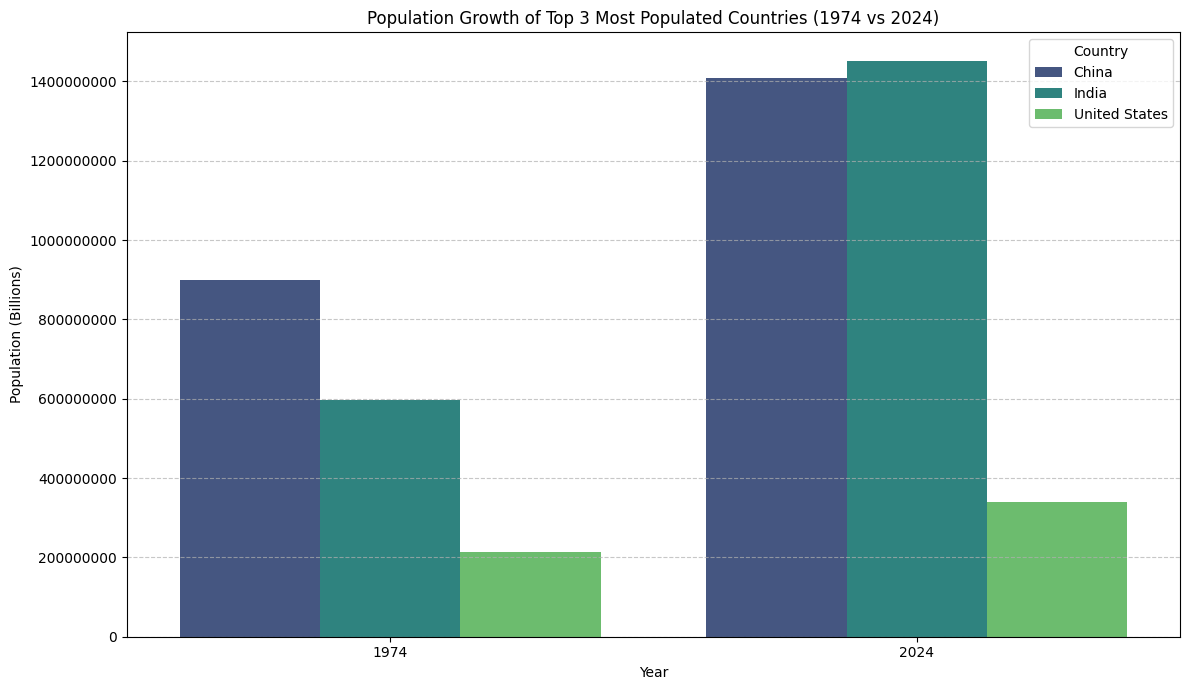

In [14]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df_plot, x='year', y='population', hue='country', palette='viridis')
plt.title('Population Growth of Top 3 Most Populated Countries (1974 vs 2024)')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')
plt.yscale('linear') # Ensure linear scale for population
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [15]:
cagr_data = {}

for country_name in top_3_country_names:
    population_1974 = df_plot[(df_plot['country'] == country_name) & (df_plot['year'] == 1974)]['population'].iloc[0]
    population_2024 = df_plot[(df_plot['country'] == country_name) & (df_plot['year'] == 2024)]['population'].iloc[0]

    # Calculate CAGR
    cagr = ((population_2024 / population_1974)**(1/50)) - 1
    cagr_data[country_name] = cagr

print("Compound Annual Growth Rate (CAGR) from 1974 to 2024:")
for country, cagr in cagr_data.items():
    print(f"{country}: {cagr:.2%}")

Compound Annual Growth Rate (CAGR) from 1974 to 2024:
India: 1.79%
China: 0.90%
United States: 0.93%


In [16]:
predicted_population_2034 = {}

for country_name in top_3_country_names:
    population_2024 = df_plot[(df_plot['country'] == country_name) & (df_plot['year'] == 2024)]['population'].iloc[0]
    cagr = cagr_data[country_name]

    # Calculate predicted population for 2034 (10 years from 2024)
    predicted_pop = population_2024 * ((1 + cagr)**10)
    predicted_population_2034[country_name] = predicted_pop

print("Predicted Population for 2034:")
for country, pop in predicted_population_2034.items():
    print(f"{country}: {pop:,.0f}")


Predicted Population for 2034:
India: 1,732,913,737
China: 1,540,996,566
United States: 373,182,543


In [17]:
df_predicted_2034 = pd.DataFrame({
    'country': predicted_population_2034.keys(),
    'year': 2034,
    'population': predicted_population_2034.values()
})

df_combined = pd.concat([df_plot, df_predicted_2034], ignore_index=True)
df_combined['year'] = df_combined['year'].astype(int)

print("Combined DataFrame for plotting (historical and predicted populations):")
display(df_combined.head(9))
print(f"Shape of df_combined: {df_combined.shape}")

Combined DataFrame for plotting (historical and predicted populations):


,country,year,population
0,China,2024,1.408975e+09
1,China,1974,9.003500e+08
2,India,2024,1.450936e+09
3,India,1974,5.970414e+08
4,United States,2024,3.401110e+08
5,United States,1974,2.138540e+08
6,India,2034,1.732914e+09
7,China,2034,1.540997e+09
8,United States,2034,3.731825e+08


Shape of df_combined: (9, 3)


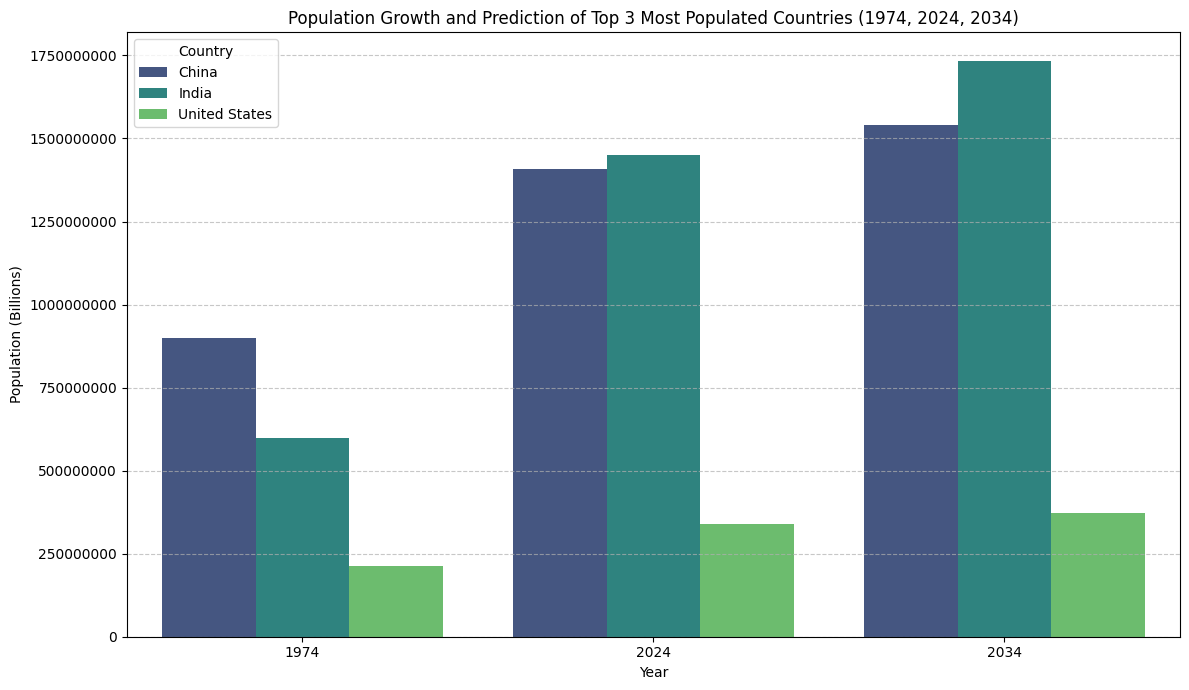

In [18]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df_combined, x='year', y='population', hue='country', palette='viridis')
plt.title('Population Growth and Prediction of Top 3 Most Populated Countries (1974, 2024, 2034)')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Compound Annual Growth Rate (CAGR) from 1974 to 2024:**
    *   India exhibited the highest growth rate at 1.79%.
    *   The United States had a CAGR of 0.93%.
    *   China recorded the lowest growth rate among the three, at 0.90%.
*   **Predicted Population for 2034:**
    *   India's population is projected to reach approximately 1,732,913,737.
    *   China's population is projected to be around 1,540,996,566.
    *   The United States' population is predicted to be approximately 373,182,543.
*   **Data Visualization:** The historical populations for 1974 and 2024, along with the predicted 2034 populations for India, China, and the United States, were successfully combined and visualized using a bar plot.

### Insights or Next Steps

*   India's significantly higher historical growth rate leads to its projected population surpassing China's by 2034, indicating a major demographic shift.
*   Further analysis could involve exploring the factors contributing to these differing growth rates (e.g., economic policies, social changes, healthcare advancements) and their potential future impact on global demographics and economies.
